<a href="https://colab.research.google.com/github/Asritha0606/GenerativeAI/blob/main/CrewAI_Financial_Analysis_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multi-Agent collaboration

- Ability of agents to talk/collaborate/communicate to each other

- A Manager to manage collaboration and interaction between agents

## Types of Processes:

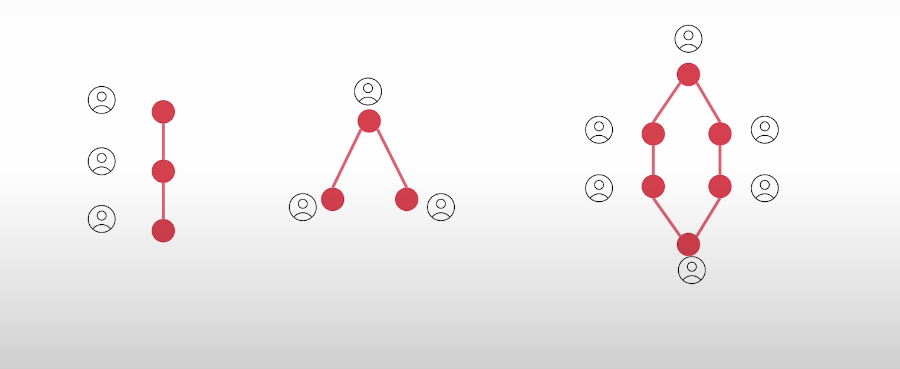

- **Sequential**: Executes tasks sequentially, ensuring tasks are completed in an orderly progression.

- **Hierarchical**: Organizes tasks in a managerial hierarchy, where tasks are delegated and executed based on a structured chain of command. A manager language model (manager_llm) needs to be specified in the crew to enable the hierarchical process. Creation and management of tasks by the manager.

- **Planned**: Aiming for collaborative decision-making among agents on task execution. For future by Crew AI

**Hierarchical Process:**

- This agent oversees task execution, including planning, delegation, and validation.

- Tasks are not pre-assigned; the manager allocates tasks to agents based on their capabilities, reviews outputs, and assesses task completion.

## Develop a Financial Analysis Agent

In [1]:
!pip install -q crewai 'crewai[tools]' --progress-bar off

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.52.4 requires tokenizers<0.22,>=0.21, but you have tokenizers 0.20.3 which is incompatible.


In [2]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

from crewai import Agent, Task, Crew

In [3]:
import os
from google.colab import userdata
groq_api_key = userdata.get('groq_api')
os.environ["GROQ_API_KEY"] = groq_api_key

hf_api_key = userdata.get('HF_TOKEN')
os.environ["HUGGINGFACEHUB_API_KEY"] = hf_api_key

serper_api_key = userdata.get('serper_api')
os.environ["SERPER_API_KEY"] = serper_api_key

gemini_api_key = userdata.get('Gemini_api')
os.environ["GEMINI_API_KEY"] = gemini_api_key

Using Gemini Model for inference

In [4]:
from crewai import LLM
gem_llm = LLM(model="gemini/gemini-1.5-flash", api_key=gemini_api_key)

In [5]:
from crewai_tools import ScrapeWebsiteTool, SerperDevTool

search_tool = SerperDevTool()
scrape_tool = ScrapeWebsiteTool()

## Blue Print:

**LLM Set up**

**Agent Creation**

- data_analyst_agent
- trading_strategy_agent
- execution_agent
- risk_management_agent

**Task Creation**

- data_analysis_task
- strategy_development_task
- execution_planning_task
- risk_assessment_task

**Crew Creation**

- financial_trading_crew

**Crew kickoff**


**Agent #1:** data_analyst_agent

In [6]:
data_analyst_agent = Agent(
    role="Data Analyst",
    goal="Monitor and analyze market data in real-time "
         "to identify trends and predict market movements.",
    backstory="Specializing in financial markets, this agent "
              "uses statistical modeling and machine learning "
              "to provide crucial insights. With a knack for data, "
              "the Data Analyst Agent is the cornerstone for "
              "informing trading decisions.",
    verbose=False,
    allow_delegation=True,
    tools = [scrape_tool, search_tool],
    llm=gem_llm
)

**Agent #2:** trading_strategy_agent

In [7]:
trading_strategy_agent = Agent(
    role="Trading Strategy Developer",
    goal="Develop and test various trading strategies based "
         "on insights from the Data Analyst Agent.",
    backstory="Equipped with a deep understanding of financial "
              "markets and quantitative analysis, this agent "
              "devises and refines trading strategies. It evaluates "
              "the performance of different approaches to determine "
              "the most profitable and risk-averse options.",
    verbose=False,
    allow_delegation=True,
    tools = [scrape_tool, search_tool],
    llm=gem_llm
)

**Agent #3:** execution_agent

In [8]:
execution_agent = Agent(
    role="Trade Advisor",
    goal="Suggest optimal trade execution strategies "
         "based on approved trading strategies.",
    backstory="This agent specializes in analyzing the timing, price, "
              "and logistical details of potential trades. By evaluating "
              "these factors, it provides well-founded suggestions for "
              "when and how trades should be executed to maximize "
              "efficiency and adherence to strategy.",
    verbose=False,
    allow_delegation=True,
    tools = [scrape_tool, search_tool],
    llm=gem_llm
)

**Agent #4:** risk_management_agent

In [9]:
risk_management_agent = Agent(
    role="Risk Advisor",
    goal="Evaluate and provide insights on the risks "
         "associated with potential trading activities.",
    backstory="Armed with a deep understanding of risk assessment models "
              "and market dynamics, this agent scrutinizes the potential "
              "risks of proposed trades. It offers a detailed analysis of "
              "risk exposure and suggests safeguards to ensure that "
              "trading activities align with the firm’s risk tolerance.",
    verbose=False,
    allow_delegation=True,
    tools = [scrape_tool, search_tool],
    llm=gem_llm
)


Task for Data Analyst Agent: Analyze Market Data

In [10]:

data_analysis_task = Task(
    description=(
        "Continuously monitor and analyze market data for "
        "the selected stock ({stock_selection}). "
        "Use statistical modeling and machine learning to "
        "identify trends and predict market movements."
    ),
    expected_output=(
        "Insights and alerts about significant market "
        "opportunities or threats for {stock_selection}."
    ),
    agent=data_analyst_agent,
)

Task for Trading Strategy Agent: Develop Trading Strategies

In [11]:

strategy_development_task = Task(
    description=(
        "Develop and refine trading strategies based on "
        "the insights from the Data Analyst and "
        "user-defined risk tolerance ({risk_tolerance}). "
        "Consider trading preferences ({trading_strategy_preference})."
    ),
    expected_output=(
        "A set of potential trading strategies for {stock_selection} "
        "that align with the user's risk tolerance."
    ),
    agent=trading_strategy_agent,
)


Task for Trade Advisor Agent: Plan Trade Execution

In [12]:

execution_planning_task = Task(
    description=(
        "Analyze approved trading strategies to determine the "
        "best execution methods for {stock_selection}, "
        "considering current market conditions and optimal pricing."
    ),
    expected_output=(
        "Detailed execution plans suggesting how and when to "
        "execute trades for {stock_selection}."
    ),
    agent=execution_agent,
)

Task for Risk Advisor Agent: Assess Trading Risks

In [13]:

risk_assessment_task = Task(
    description=(
        "Evaluate the risks associated with the proposed trading "
        "strategies and execution plans for {stock_selection}. "
        "Provide a detailed analysis of potential risks "
        "and suggest mitigation strategies."
    ),
    expected_output=(
        "A comprehensive risk analysis report detailing potential "
        "risks and mitigation recommendations for {stock_selection}."
    ),
    agent=risk_management_agent,
)

In [20]:
from crewai import Crew, Process
# from langchain_openai import ChatOpenAI

# Define the crew with agents and tasks
financial_trading_crew = Crew(
    agents=[data_analyst_agent,
            trading_strategy_agent,
            execution_agent,
            risk_management_agent],

    tasks=[data_analysis_task,
           strategy_development_task,
           execution_planning_task,
           risk_assessment_task],

    manager_llm= gem_llm, #LLM(model="groq/llama3-8b-8192", temperature=0.3),
    # ChatOpenAI(model="gpt-3.5-turbo", temperature=0.7),
    process=Process.hierarchical,
    verbose=False
)

In [21]:
# Example data for kicking off the process
financial_trading_inputs = {
    'stock_selection': 'AAPL',
    'initial_capital': '100000',
    'risk_tolerance': 'Medium',
    'trading_strategy_preference': 'Day Trading',
    'news_impact_consideration': True
}

In [22]:
### this execution will take some time to run
result = financial_trading_crew.kickoff(inputs=financial_trading_inputs)

In [24]:
from IPython.display import Markdown
Markdown(str(result))

**Comprehensive Risk Analysis Report: AAPL Trading Strategies**

This report analyzes the risks associated with three proposed trading strategies for Apple Inc. (AAPL) stock and provides mitigation strategies.  The strategies are:

1. **Moving Average Crossover with RSI Confirmation:** This strategy uses moving averages and RSI to identify trend changes.  Risks include:

    * **Lagging Indicators:** Moving averages are lagging indicators, potentially leading to late entries or exits.
    * **False Signals:**  Market noise can generate false crossovers or RSI signals.
    * **Market Volatility:** Unexpected market events can invalidate the signals.

    **Mitigation:**  Use multiple timeframes for confirmation, combine with other indicators, and implement strict risk management (stop-losses, position sizing).

2. **RSI Divergence Trading:** This strategy identifies potential reversals using RSI divergences. Risks include:

    * **Subjectivity:** Identifying divergences can be subjective and prone to interpretation biases.
    * **False Signals:** Divergences may not always lead to price reversals.
    * **Delayed Reversals:** Price reversals can be delayed, leading to losses if stop-losses are hit.

    **Mitigation:**  Use additional confirmation indicators (volume, price action), confirm divergences with other techniques, and use tight stop-losses.

3. **Candlestick Pattern Recognition with Volume Confirmation:** This strategy uses candlestick patterns and volume to identify reversals. Risks include:

    * **Subjectivity:** Identifying patterns can be subjective.
    * **False Signals:** Patterns may not always lead to reversals.
    * **Confirmation Bias:** Traders may focus on confirming their biases rather than objective analysis.
    * **Market Manipulation:**  Large players may create patterns to trap traders.

    **Mitigation:**  Use clear pattern definitions, combine with other technical indicators, employ strict risk management, and avoid over-reliance on any single pattern.


**Overall Plan Risks:**

* **Over-reliance on Technical Analysis:**  The strategies heavily rely on technical analysis, neglecting fundamental analysis.  Fundamental shifts in the company's prospects could invalidate technical signals.
* **Market Volatility:**  Sudden market shifts (e.g., news events, economic downturns) can significantly impact the effectiveness of the strategies.
* **Lack of Diversification (beyond the 3 strategies):** Although the plan uses three strategies, they all rely heavily on price and technical indicators.  There's no diversification across asset classes.
* **Risk of Overtrading:** Following multiple strategies simultaneously could lead to overtrading and increased transaction costs.
* **Indicator Limitations:** Technical indicators are not perfect predictors; they can generate false signals.
* **Psychological Factors:** Emotional decisions can override rational risk management, leading to losses.

**Overall Mitigation Strategies:**

* **Diversification:** Consider diversifying the portfolio beyond AAPL into other assets.
* **Fundamental Analysis:** Incorporate fundamental analysis to assess the company's long-term prospects.
* **Position Sizing:** Strictly adhere to the 1-2% maximum loss per trade rule.
* **Stop-Loss Orders:**  MANDATORY for every trade.  Adjust stop-loss levels based on market volatility.
* **Trailing Stop-Losses:** Use trailing stop-losses to protect profits as trades move in your favor.
* **Regular Review and Adjustment:** Regularly monitor performance and adapt strategies as needed.
* **Backtesting:**  Thoroughly backtest the strategies using historical data before live trading.
* **Emotional Discipline:** Develop a trading plan and stick to it, avoiding impulsive decisions.
* **Risk Tolerance Assessment:** Determine and maintain a realistic risk tolerance level.
* **Professional Advice:**  Consider consulting with a qualified financial advisor.



**Disclaimer:** This report is for informational purposes only and does not constitute financial advice.  Trading involves significant risk, and you could lose money.  Always conduct thorough research and seek professional advice before making any investment decisions.